# Classification Hackathon

For the specifications for today's Hackathon use the slides linked below. Just note a couple things before you start:
* Use your full name and ```_EDSA``` as your Zindi username.
* The dataset for this challenge is very large and will take a long time to process. In order to use your time wisely, only use a small subset of the data to figure out how to solve this challenge, and once you're happy with that, train your model with the entire dataset.
* This Zindi challenge is tough. This will be taken into account when the supervisors mark your work. Do not worry too much about your placement on the leaderboard. In the Regression Hackathon ```laura_the_explorer``` was in first place but is outside the top 100 in this challenge
* To submit your Hackathon to Athena, zip your notebook and your submission csv file, and upload that here. Note that your report card will say you have 100% once you submit your file.
* Please attach the *Honour code* (below) cell to your notebook. 

Further instructions found on these slides: https://docs.google.com/presentation/d/1AbVndI5aOd27Jm0E1qNoYzRtWiZ6-DE3BDE0djGxzIk/edit?usp=sharing

** Good luck! **

## Honour Code
I Alfred, Maboa, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

In [664]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline

In [666]:
train = pd.read_csv("gdrive/My Drive/Colab Notebooks/Zindi/Xente Fraud Detection Challenge/training.csv")
test = pd.read_csv("gdrive/My Drive/Colab Notebooks/Zindi/Xente Fraud Detection Challenge/test.csv")
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [667]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [668]:
y = train['FraudResult']
train.drop(['FraudResult'], axis=1, inplace=True)
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2


In [669]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: FraudResult, dtype: int64

In [0]:
train_ID = train['TransactionId']
test_ID = test['TransactionId']
# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop(['TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode', 'CountryCode', 'AccountId', 'CustomerId', 'ProviderId', 'ProductId'], axis=1, inplace=True)
test.drop(['TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode', 'CountryCode', 'AccountId', 'CustomerId', 'ProviderId', 'ProductId'], axis=1, inplace=True)

In [671]:
train.head()

,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2
1,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2
2,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2
3,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2
4,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2


In [672]:
features = pd.concat([train, test],sort=False).reset_index(drop=True)
features.shape

(140681, 6)

In [673]:
D_features = pd.get_dummies(features, columns=["ProductCategory", 'ChannelId'], sparse=True)
D_features.head()

,Amount,Value,TransactionStartTime,PricingStrategy,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5
0,1000.0,1000,2018-11-15T02:18:49Z,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-20.0,20,2018-11-15T02:19:08Z,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,500.0,500,2018-11-15T02:44:21Z,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,20000.0,21800,2018-11-15T03:32:55Z,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,-644.0,644,2018-11-15T03:34:21Z,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [674]:
D_features['TransactionStartTime'] = pd.to_datetime(D_features['TransactionStartTime'])
D_features.head()

,Amount,Value,TransactionStartTime,PricingStrategy,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5
0,1000.0,1000,2018-11-15 02:18:49+00:00,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-20.0,20,2018-11-15 02:19:08+00:00,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,500.0,500,2018-11-15 02:44:21+00:00,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,-644.0,644,2018-11-15 03:34:21+00:00,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [675]:
D_features['TransactionStartTime'] = D_features['TransactionStartTime'].dt.hour #hour of the day
D_features.head()

,Amount,Value,TransactionStartTime,PricingStrategy,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5
0,1000.0,1000,2,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-20.0,20,2,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,500.0,500,2,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,20000.0,21800,3,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,-644.0,644,3,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [676]:
# Spliting the data back to train(X,y) and test(X_sub)
X = D_features.iloc[:len(y), :]
X_test_final = D_features.iloc[len(y):, :]
print('Features size for train(X,y) and test(X_test):')
print('X', X.shape, 'y', y.shape, 'X_test_final', X_test_final.shape)

Features size for train(X,y) and test(X_test):
X (95662, 19) y (95662,) X_test_final (45019, 19)


**Model Validation**

In [0]:
from xgboost import XGBClassifier
model = XGBClassifier(colsample_bytree= 0.6,gamma= 0.5, max_depth= 3, min_child_weight= 1, subsample= 0.6)

In [0]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=10)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.20)

In [680]:
# train model with 80% of train set
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [0]:
# predict 20% of train set
y_prob = model.predict_proba(X_test)


In [0]:
y_pred = np.where(y_prob[:,1] > 0.7, 1, 0)

In [683]:
# performance matrics and model eveluation using sklearn.metrics inbuilt classification metric
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       1.00      0.83      0.91        36

    accuracy                           1.00     19133
   macro avg       1.00      0.92      0.95     19133
weighted avg       1.00      1.00      1.00     19133



In [0]:
# def _score_func(estimator, X, y):
#     score1 = metrics.log_loss(y,model.predict_proba(X))
#     return -score1

In [685]:
# # Gridsearch
# from sklearn.model_selection import GridSearchCV

# parameters = { 'min_child_weight': [1, 5, 10],
#                 'gamma': [0.5, 1, 1.5, 2, 5],
#                 'subsample': [0.6, 0.8, 1.0],
#                 'colsample_bytree': [0.6, 0.8, 1.0],
#                 'max_depth': [3, 4, 5]
#                 }

# grid_search = GridSearchCV(estimator = model,
#                            param_grid = parameters,
#                            scoring = _score_func,
#                            cv = 5,
#                            n_jobs = -1,
#                            iid = False)
# grid_search.fit(X_train, y_train)
# best_parameters = grid_search.best_params_
best_parameters

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 3,
 'min_child_weight': 1,
 'subsample': 0.6}

**Final Model**

In [0]:
from xgboost import XGBClassifier
model = XGBClassifier(colsample_bytree= 0.6,gamma= 0.5, max_depth= 3, min_child_weight= 1, subsample= 0.6)
 

In [687]:
model.fit(X.values, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [0]:
y_probs = model.predict_proba(X_test_final.values)

In [0]:
y_predicted = np.where(y_probs[:,1] > 0.6, 1, 0)

In [690]:
y_predicted[:5]

array([0, 0, 0, 0, 0])

[Text(0.5, 1.0, 'FraudResult')]

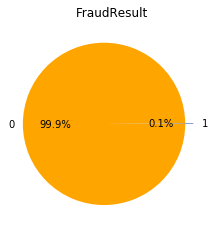

In [691]:
# Plot the accuracy for each classifier
f, ax = plt.subplots(figsize=(20, 10))
sns.set_color_codes(palette='deep')
plt.subplots_adjust(wspace = 0.5)
ax = plt.subplot(2, 4, 1)
plt.pie([sum(y_predicted), len(y_predicted) - sum(y_predicted)],
        labels = ['1', '0'],explode = (0, 0.1),autopct='%1.1f%%', colors=['b','orange'])
ax.set(title="FraudResult")

**Submission**

In [0]:
submission = pd.DataFrame({'TransactionId' : np.array(test_ID),'FraudResult' : y_predicted})

In [693]:
submission.head()

,TransactionId,FraudResult
0,TransactionId_50600,0
1,TransactionId_95109,0
2,TransactionId_47357,0
3,TransactionId_28185,0
4,TransactionId_22140,0


In [0]:
submission.to_csv("gdrive/My Drive/Colab Notebooks/Zindi/Xente Fraud Detection Challenge/new_submission.csv", index=False)